Empleando los datos del archivo './src/crypto_currency'.

- Cargue los datos en una base de datos apropiada.
- Lea mediante pandas las bases cargadas
- Emplee un metodo de concatenación para unificar la información.(debe considerar que se añadirá una columna adicional que especifique el tipo de moneda)
- Genere un agrupamiento de información a manera de obtener un resumen de los datos.
- Almacene dichos datos en un reporte excel.
- Apoyandose del ejercicio 2. Cree una imagen que sea guarda en el archivo excel
- Emplee un método de envio de correos



In [1]:
pip install pandas openpyxl matplotlib


Note: you may need to restart the kernel to use updated packages.


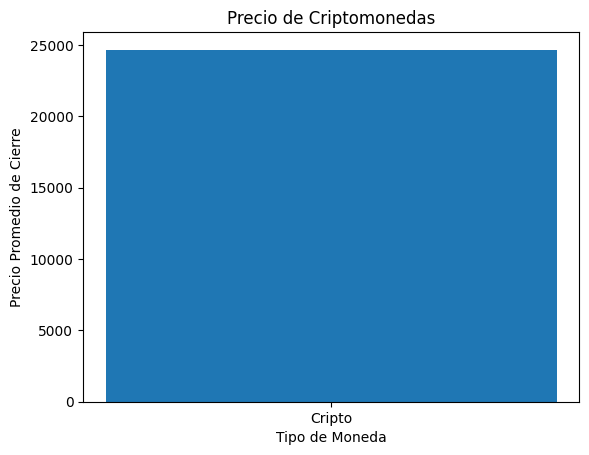

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email import encoders
import smtplib

# Paso 1: Cargar datos desde un archivo Excel
data_path = './src/cripto_currency.xlsx'
df = pd.read_excel(data_path)

# Paso 2: Concatenar información y añadir columna de tipo de moneda
df['Tipo Moneda'] = 'Cripto'

# Paso 3: Agrupar información y obtener resumen
resumen = df.groupby(['Tipo Moneda']).agg({'Close': 'mean'}).reset_index()

# Paso 4: Almacenar resumen en un archivo Excel
resumen.to_excel('./src/resumen_cripto.xlsx', index=False)

# Paso 5: Crear gráfico y guardar como imagen
plt.bar(resumen['Tipo Moneda'], resumen['Close'])
plt.title('Precio de Criptomonedas')
plt.xlabel('Tipo de Moneda')
plt.ylabel('Precio Promedio de Cierre')
plt.savefig('./src/grafico_cripto.png')

# Paso 6: Enviar correo electrónico con archivo adjunto
email_address = 'dc.96.15.11@gmail.com'
token = 'abdt ytbv mdkj sfcx'
to_email = 'tatianagalarzah97@gmail.com'

# Configurar el mensaje
message = MIMEMultipart()
message['From'] = 'dc.96.15.11@gmail.com'
message['To'] = 'tatianagalarzah97@gmail.com'
message['Subject'] = 'Informe de Criptomonedas'

# Cuerpo del mensaje
body = 'Adjunto encontrarás el informe de criptomonedas y un gráfico.'
message.attach(MIMEText(body, 'plain'))

# Adjuntar archivo Excel
excel_path = './src/resumen_cripto.xlsx'
with open(excel_path, 'rb') as file:
    attach = MIMEBase('application', 'octet-stream')
    attach.set_payload(file.read())
    encoders.encode_base64(attach)
    attach.add_header('Content-Disposition', 'attachment', filename='resumen_cripto.xlsx')
    message.attach(attach)

# Adjuntar imagen
img_path = './src/grafico_cripto.png'
with open(img_path, 'rb') as file:
    attach = MIMEBase('application', 'octet-stream')
    attach.set_payload(file.read())
    encoders.encode_base64(attach)
    attach.add_header('Content-Disposition', 'attachment', filename='grafico_cripto.png')
    message.attach(attach)

# Configurar servidor SMTP
smtp_server = 'smtp.gmail.com'
smtp_port = 587

# Iniciar sesión y enviar correo
with smtplib.SMTP(smtp_server, smtp_port) as server:
    server.starttls()
    server.login(email_address, token)
    server.sendmail(email_address, to_email, message.as_string())
